In [1]:
from installFunctions import *
import pandas as pd
import numpy as np

In [2]:
from datetime import date

In [3]:
import holidays

In [4]:
gyra_fees = pd.read_csv('./install_csv/gyra_fees.csv')

In [5]:
import requests

In [6]:
import werkzeug

In [7]:
rPaymentDate = datetime.datetime.strptime('20-12-2020', '%d-%m-%Y')
rDisbursementDate = datetime.datetime.strptime('29-10-2020', '%d-%m-%Y')
period = 24

In [8]:
days_each_month, installDates, payDay = returnDaysEachMonth(period, rPaymentDate, rDisbursementDate)

In [55]:
days_each_month, installDates, payDay = returnDaysEachMonth(period, rPaymentDate, rDisbursementDate)
    
amortization_amount = calculate_amortization_amount(16800.0, 0.0379, installDates, rDisbursementDate)

In [56]:
amortization_amount

1113.426112

In [62]:
days_each_months = []
soma = 0
for i in installDates:

    days = ( i - ( date(rDisbursementDate.year, rDisbursementDate.month, rDisbursementDate.day) ) ).days

    days_each_months.append(days)

    print(soma,(days)/30.0)
    soma = soma + ( 1/( (1+0.0379)**( (days)/30.0) ) )

0 1.7333333333333334
0.9375557736181476 2.7666666666666666
1.8397563154838232 3.8
2.7079348715195035 4.733333333333333
3.54648798689736 5.766666666666667
4.35341926113767 6.766666666666667
5.130884599070333 7.8
5.879031716182867 8.8
6.599859461738831 9.833333333333334
7.293504790296398 10.866666666666667
7.960992750902903 11.866666666666667
8.604106693100132 12.9
9.222968806116167 13.9
9.819232524216211 14.933333333333334
10.39301113526213 15.966666666666667
10.945152552725578 16.9
11.478452877323885 17.933333333333334
11.991642444674037 18.933333333333334
12.486092360224815 19.966666666666665
12.961896567598867 20.966666666666665
13.420326288548912 22.0
13.86146862299622 23.033333333333335
14.285975478350887 24.033333333333335
14.694981023542779 25.066666666666666


In [63]:
(1+0.0379)**12

1.5626659294986456

In [61]:
16800.0*((1+0.0379)**12)

26252.787615577246

In [65]:
16800*((0.0379*(1+0.0379)**24)/((1+0.0379)**24-1))

1078.2964239672165

In [59]:
days_each_months

[52,
 83,
 114,
 142,
 173,
 203,
 234,
 264,
 295,
 326,
 356,
 387,
 417,
 448,
 479,
 507,
 538,
 568,
 599,
 629,
 660,
 691,
 721,
 752]

In [12]:
installments, amortization_amount = amortization_schedule(16800.0, 0.0379, period, rPaymentDate, rDisbursementDate)
installments = pd.DataFrame(installments)

In [13]:
amortization_amount

1113.426112

In [14]:
np.sum(days_each_month)

752

In [24]:
(1+np.abs(-1+1/np.power(amortization_amount,1/np.sum(days_each_month))))**(30)

1.3195291240097708

In [25]:
np.sum(days_each_month)

752

In [27]:
principal = 16800.0

In [66]:
from scipy.optimize import root

In [105]:
0.0379 = (1+tj)**(30)-1

-1.9622505840264837

In [109]:
np.power(0.0379+1,1/30)-1

0.0012407504610527642

In [143]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx,array[idx]

In [192]:
def func(A,P,M,tj):
    return A - P*( (tj*(np.power(1+tj,M))) / ( np.power(1+tj,M) - 1) )

def func2(tj,*data):
    A,P,M = data
    return A - P*( (tj*(np.power(1+tj,M))) / ( np.power(1+tj,M) - 1) )

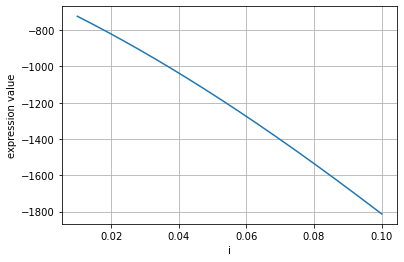

1113.426112 16800.0 25.066666666666666
The solution is i = -0.156851
at which the value of the expression is 0.000000


In [225]:
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define the expression whose roots we want to find

A = amortization_amount
P = principal
M = np.sum(days_each_month)/30
#M = 25

# Plot it

l = np.linspace(0.01, 0.1, 100000)

plt.plot(l, func(A,P,M,l))
plt.xlabel("i")
plt.ylabel("expression value")
plt.grid()
plt.show()

# Use the numerical solver to find the roots

i_initial_guess = 0.01
i_solution = fsolve(func2, i_initial_guess,args=(A,P,M))

print(A,P,M)
print("The solution is i = %f" % i_solution)
print("at which the value of the expression is %f" % func2(i_solution,*(A,P,M)))

In [230]:
def func3(interest_rate, *data):
    
    principal, amortization, installDates, rDisbursementDate = data
    
    soma = 0

    for i in installDates:

        days = ( i - ( date(rDisbursementDate.year, rDisbursementDate.month, rDisbursementDate.day) ) ).days

        soma = soma + ( 1/( (1+interest_rate)**( (days)/30.0) ) )
    
    return np.round(principal/soma,6) - amortization

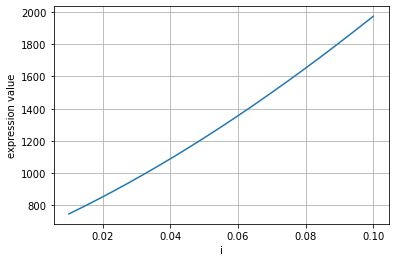

50 16800.0 25.066666666666666
The solution is i = -0.144892
at which the value of the expression is 0.000000


In [235]:
A = 50
P = principal
I = installDates
D = rDisbursementDate
#M = 25

# Plot it

l = np.linspace(0.01, 0.1, 100000)

plt.plot(l, func3(l,*(P,A,I,D)))
plt.xlabel("i")
plt.ylabel("expression value")
plt.grid()
plt.show()

# Use the numerical solver to find the roots

i_initial_guess = 0.01
i_solution = fsolve(func3, i_initial_guess,args=(P,A,I,D))

print(A,P,M)
print("The solution is i = %f" % i_solution)
print("at which the value of the expression is %f" % func3(i_solution,*(P,A,I,D)))

In [200]:
from scipy import optimize

In [224]:
l = np.linspace(0.01, 0.1, 1000,dtype=np.float64)
idx, _ = find_nearest(func(A,P,M,l), 0)
l[idx]

0.01

In [205]:
l[62146]

0.0014858648586485866

In [161]:
A,P,M

(1113.426112, 16800.0, 752)

In [162]:
func(A,P,M,0.001)

1081.6320205949455

In [129]:
optimize.root(func, i_initial_guess, jac=False, method='hybr')

    fjac: array([[-1.]])
     fun: array([-4.54747351e-13])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.48292508e-07])
       r: array([11563.362795])
  status: 1
 success: True
       x: array([0.04331652])

In [132]:
func(np.linspace(0.0001, 0.1, 10000))

array([ 440.55216258,  440.4648079 ,  440.37744625, ..., -737.11314162,
       -737.25531944, -737.39750079])

In [121]:
func(0.000110)

1090.1477210401122

In [95]:
amortization_amount

1113.426112

In [110]:
func(0.0012407504610527642)

1079.0527823174268

In [117]:
pd.DataFrame(func(i)-A)

,0
0,-23.192069
1,-23.277612
2,-23.363362
3,-23.449319
4,-23.535482
...,...
995,-167.431101
996,-167.596969
997,-167.762842
998,-167.928718


In [12]:
installments

,installDates,payDayDates,number,amortization_amount,interest,principal,balance
0,2020-12-20,2020-12-21,1,1113.426112,1118.933969,-5.507857,16805.507857
1,2021-01-20,2021-01-20,2,1113.426112,658.570459,454.855653,16350.652205
2,2021-02-20,2021-02-22,3,1113.426112,640.745678,472.680434,15877.971771
3,2021-03-20,2021-03-22,4,1113.426112,560.956607,552.469505,15325.502266
4,2021-04-20,2021-04-20,5,1113.426112,600.572333,512.853779,14812.648487
5,2021-05-20,2021-05-20,6,1113.426112,561.399378,552.026734,14260.621753
6,2021-06-20,2021-06-21,7,1113.426112,558.842035,554.584077,13706.037676
7,2021-07-20,2021-07-20,8,1113.426112,519.458828,593.967284,13112.070392
8,2021-08-20,2021-08-20,9,1113.426112,513.832863,599.593249,12512.477143
9,2021-09-20,2021-09-20,10,1113.426112,490.336138,623.089974,11889.387169


In [13]:
initial_amount = 16000

array_irr = [ (i[1], i[0]) for i in installments[['amortization_amount','installDates']].values ]

addDay = datetime.date(rDisbursementDate.year, rDisbursementDate.month, rDisbursementDate.day)

array_irr.insert(0,(datetime.date(addDay.year, addDay.month, addDay.day),-initial_amount))

annualCet = np.round(xirr(array_irr),6)

cet = ((annualCet+1)**(30/365))-1

annualCet = ((1+cet)**12) - 1

annualCet,cet

NameError: name 'installments' is not defined

In [48]:
days_each_month, installDates, payDay = returnDaysEachMonth(period, datetime.datetime.strptime('20-12-2020', '%d-%m-%Y'), datetime.datetime.strptime('20-11-2020', '%d-%m-%Y'))

In [84]:
calculate_amortization_schedule_with_taxes(16800, 16000, 0.0379, period=24, iof=False, rPaymentDate=rPaymentDate, rDisbursementDate=rDisbursementDate)

0.04292112688471161 0.655837
0.042320897814650094 0.644437386263919


({'installDates': {0: datetime.date(2020, 12, 20),
   1: datetime.date(2021, 1, 20),
   2: datetime.date(2021, 2, 20),
   3: datetime.date(2021, 3, 20),
   4: datetime.date(2021, 4, 20),
   5: datetime.date(2021, 5, 20),
   6: datetime.date(2021, 6, 20),
   7: datetime.date(2021, 7, 20),
   8: datetime.date(2021, 8, 20),
   9: datetime.date(2021, 9, 20),
   10: datetime.date(2021, 10, 20),
   11: datetime.date(2021, 11, 20),
   12: datetime.date(2021, 12, 20),
   13: datetime.date(2022, 1, 20),
   14: datetime.date(2022, 2, 20),
   15: datetime.date(2022, 3, 20),
   16: datetime.date(2022, 4, 20),
   17: datetime.date(2022, 5, 20),
   18: datetime.date(2022, 6, 20),
   19: datetime.date(2022, 7, 20),
   20: datetime.date(2022, 8, 20),
   21: datetime.date(2022, 9, 20),
   22: datetime.date(2022, 10, 20),
   23: datetime.date(2022, 11, 20)},
  'payDayDates': {0: datetime.date(2020, 12, 21),
   1: datetime.date(2021, 1, 20),
   2: datetime.date(2021, 2, 22),
   3: datetime.date(2021, 3, 

# IRR

In [271]:
initial_amount = 65000
array_irr = list(installments['amortization_amount'].values)
array_irr.insert(0,-initial_amount)

cet = np.irr(array_irr)
annualCet = (1+cet)**12-1

'cet ' + str(np.round(cet*100,4))+'%','Annual Cet ' + str(np.round(annualCet*100,4))+'%'

('cet 4.7253%', 'Annual Cet 74.0274%')

# XIRR

In [272]:
def xirr(transactions):
    years = [(ta[0] - transactions[0][0]).days / 365.0 for ta in transactions]
    residual = 1
    step = 0.05
    guess = 0.05
    epsilon = 0.0001
    limit = 10000
    while abs(residual) > epsilon and limit > 0:
        limit -= 1
        residual = 0.0
        for i, ta in enumerate(transactions):
            residual += ta[1] / pow(guess, years[i])
        if abs(residual) > epsilon:
            if residual > 0:
                guess += step
            else:
                guess -= step
                step /= 2.0
    return guess-1

In [273]:
array_irr = [ (i[1], i[0]) for i in installments[['amortization_amount','installDates']].values ]

In [274]:
array_irr.insert(0,(datetime.date(rDisbursementDate.year, rDisbursementDate.month, rDisbursementDate.day+1),-65000))

In [275]:
'Annual Cet ' + str(np.round(xirr(array_irr)*100,4))+'%'

'Annual Cet 68.2616%'

In [276]:
def xirr(df, guess=0.05, date_column='date', amount_column='amount'):
    '''Calculates XIRR from a series of cashflows. 
       Needs a dataframe with columns date and amount, customisable through parameters. 
       Requires Pandas, NumPy libraries'''

    df = df.sort_values(by=date_column).reset_index(drop=True)

    amounts = df[amount_column].values
    dates = df[date_column].values

    years = np.array(dates-dates[0], dtype='timedelta64[D]').astype(int)/365

    step = 0.05
    epsilon = 0.0001
    limit = 1000
    residual = 1

    #Test for direction of cashflows
    disc_val_1 = np.sum(amounts/((1+guess)**years))
    disc_val_2 = np.sum(amounts/((1.05+guess)**years))
    mul = 1 if disc_val_2 < disc_val_1 else -1

    #Calculate XIRR    
    for i in range(limit):
        prev_residual = residual
        residual = np.sum(amounts/((1+guess)**years))
        if abs(residual) > epsilon:
            if np.sign(residual) != np.sign(prev_residual):
                step /= 2
            guess = guess + step * np.sign(residual) * mul   
        else:
            return guess

In [277]:
'Annual Cet ' + str(np.round(xirr(pd.DataFrame(array_irr),0.04,0,1)*100,4))+'%'

'Annual Cet 68.2616%'

In [236]:
from scipy import optimize

In [237]:
def xnpv(rate, values, dates):
    '''Equivalent of Excel's XNPV function.

    >>> from datetime import date
    >>> dates = [date(2010, 12, 29), date(2012, 1, 25), date(2012, 3, 8)]
    >>> values = [-10000, 20, 10100]
    >>> xnpv(0.1, values, dates)
    -966.4345...
    '''
    if rate <= -1.0:
        return float('inf')
    d0 = dates[0]    # or min(dates)
    return sum([ vi / (1.0 + rate)**((di - d0).days / 365.0) for vi, di in zip(values, dates)])

def xirr(values, dates):
    '''Equivalent of Excel's XIRR function.

    >>> from datetime import date
    >>> dates = [date(2010, 12, 29), date(2012, 1, 25), date(2012, 3, 8)]
    >>> values = [-10000, 20, 10100]
    >>> xirr(values, dates)
    0.0100612...
    '''
    try:
        return scipy.optimize.newton(lambda r: xnpv(r, values, dates), 0.0)
    except RuntimeError:    # Failed to converge?
        return scipy.optimize.brentq(lambda r: xnpv(r, values, dates), -1.0, 1e10)

In [238]:
values = [ i[0] for i in installments[['amortization_amount','installDates']].values ]
dates = [ i[1] for i in installments[['amortization_amount','installDates']].values ]
values.insert(0,-65000)
dates.insert(0,datetime.date(rDisbursementDate.year, rDisbursementDate.month, rDisbursementDate.day))

In [239]:
xirr(values, dates)

0.6826159706073737

In [2]:
((0.740273849822884+1)**(1/12))-1

0.04725264567610643